<a href="https://colab.research.google.com/github/Rashedul-Rashed/AI-LAB-FINAL-PROJECT/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mount Drive and Read Dataset**

In [1171]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1172]:
import pandas as pd

In [1173]:
rainfall = pd.read_csv('gdrive/My Drive/Ai Project/data_monthly_rainfall.csv')

#**Show Dataset**

In [1174]:
rainfall.head(10)

,Year,Station,Month,Rainfall,StationIndex
0,1970,Barisal,1,0,2
1,1970,Barisal,2,24,2
2,1970,Barisal,3,5,2
3,1970,Barisal,4,91,2
4,1970,Barisal,5,124,2
5,1970,Barisal,6,408,2
6,1970,Barisal,7,530,2
7,1970,Barisal,8,317,2
8,1970,Barisal,9,571,2
9,1970,Barisal,10,253,2


In [1175]:
rainfall.shape

(16755, 5)

#**Show All Information with missing Value**

In [1176]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16755 entries, 0 to 16754
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          16755 non-null  int64 
 1   Station       16755 non-null  object
 2   Month         16755 non-null  int64 
 3   Rainfall      16755 non-null  int64 
 4   StationIndex  16755 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 654.6+ KB


#**Show Null Value**

In [1177]:
rainfall.isnull().sum()

Year            0
Station         0
Month           0
Rainfall        0
StationIndex    0
dtype: int64

#**Import library for data visualization**

In [1178]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()

Station
Teknaf         342.345833
Sylhet         339.322464
Sandwip        301.135185
CoxsBazar      297.195035
Hatiya         262.546748
Kutubdia       262.401042
Sitakunda      258.539583
M.court        252.279630
Ambagan_ctg    246.175926
Feni           241.273256
Chittagong     240.571429
Khepupara      226.951550
Patuakhali     210.873016
Rangamati      208.223404
Bhola          191.597826
Srimangal      188.068716
Rangpur        181.375000
Mymensingh     175.372340
Name: Rainfall, dtype: float64
Station
Barisal      174.177305
Dhaka        170.219203
Chandpur     169.879845
Comilla      168.342391
Madaripur    162.918750
Mongla       160.336538
Dinajpur     159.243590
Faridpur     152.226950
Tangail      148.525000
Khulna       147.150362
Bogra        143.335740
Satkhira     137.978723
Jessore      137.746212
Ishurdi      127.975177
Rajshahi     121.836957
Name: Rainfall, dtype: float64


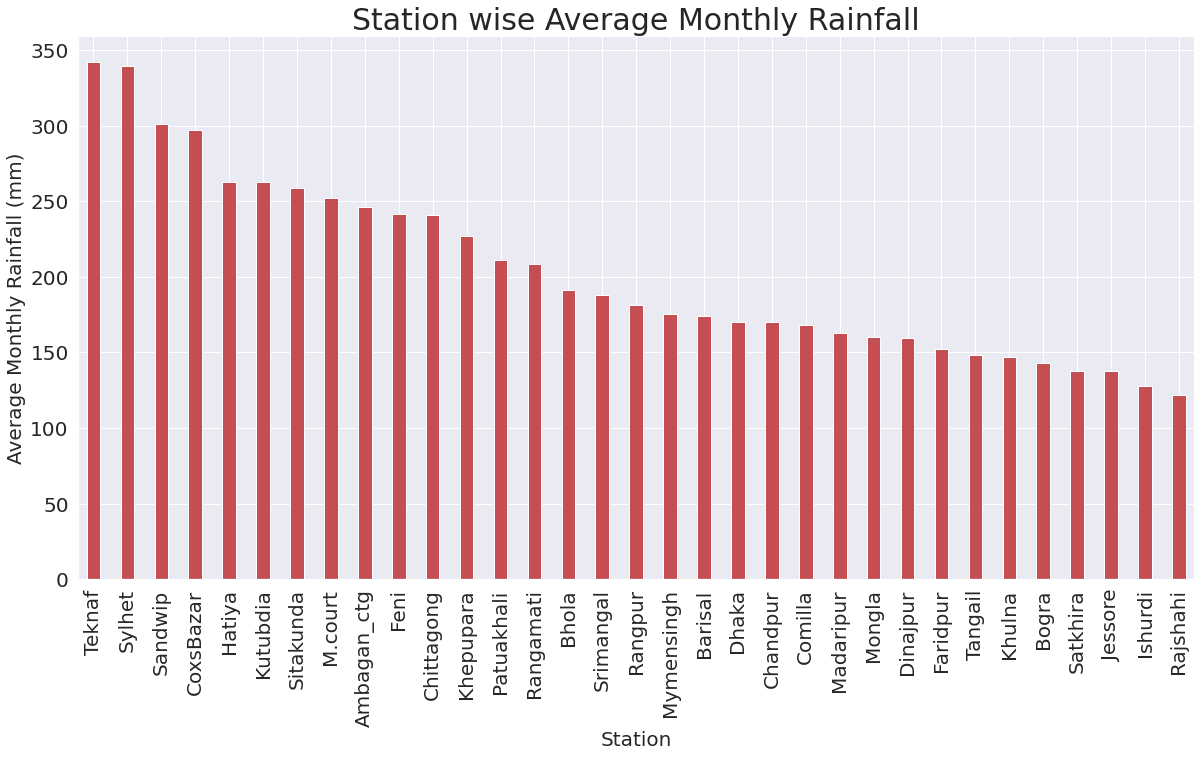

In [1179]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
rainfall.groupby('Station').mean().sort_values(by='Rainfall', ascending=False)['Rainfall'].plot(kind='bar', color='r',width=0.4,title='Station wise Average Monthly Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Monthly Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(rainfall.groupby('Station').mean().sort_values(by='Rainfall', ascending=False)['Rainfall'][[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]])
print(rainfall.groupby('Station').mean().sort_values(by='Rainfall', ascending=False)['Rainfall'][[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]])

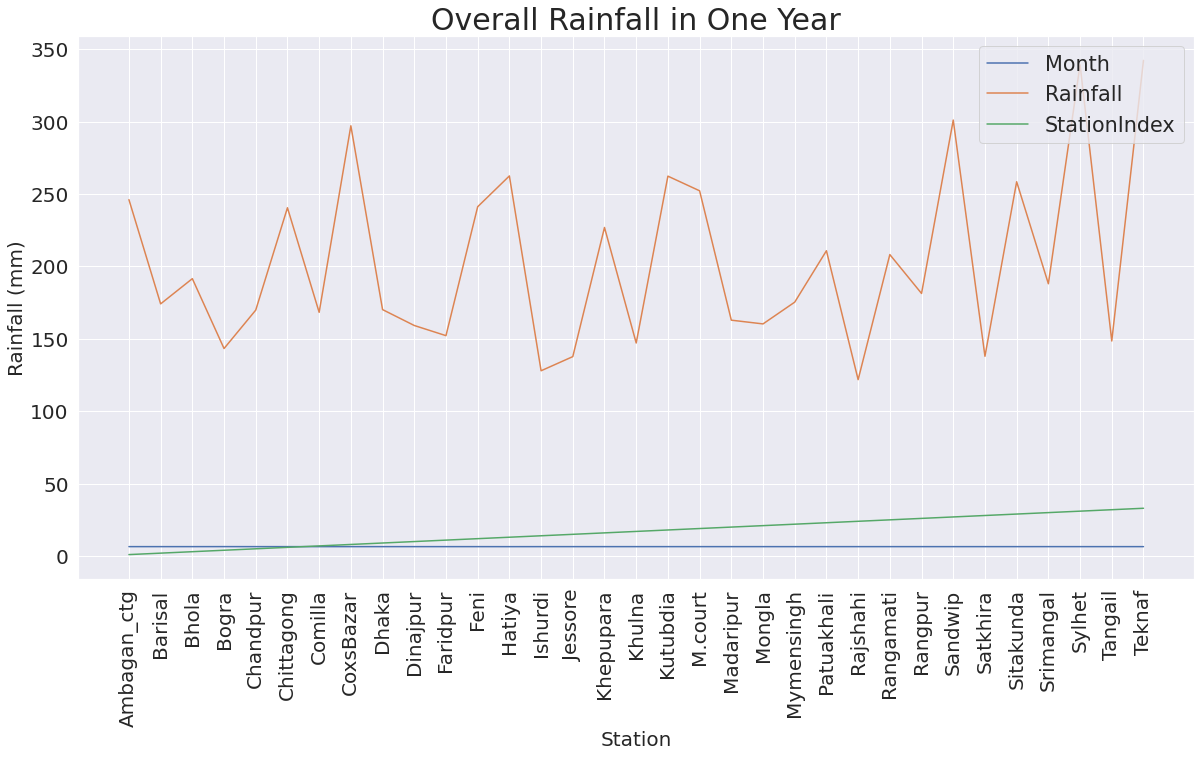

In [1180]:
Months = rainfall.columns[2:5]
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
xlbls = rainfall['Station'].unique()
xlbls.sort()
dfg = rainfall.groupby('Station').mean()[Months]
dfg.plot.line(title='Overall Rainfall in One Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,32,33,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


In [1181]:
unique_station = rainfall['Station'].unique()
for i,station in enumerate(unique_station):
    rainfall['Station'] = rainfall['Station'].replace(station, i)
rainfall.head()

,Year,Station,Month,Rainfall,StationIndex
0,1970,0,1,0,2
1,1970,0,2,24,2
2,1970,0,3,5,2
3,1970,0,4,91,2
4,1970,0,5,124,2


In [1182]:
nRowsRead = 16755 # specify 'None' if want to read whole file
rainfall.dataframeName = 'data_monthly_rainfall.csv'
nRow, nCol = rainfall.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16755 rows and 5 columns


In [1183]:
rainfall.head(16755)

,Year,Station,Month,Rainfall,StationIndex
0,1970,0,1,0,2
1,1970,0,2,24,2
2,1970,0,3,5,2
3,1970,0,4,91,2
4,1970,0,5,124,2
...,...,...,...,...,...
16750,2016,28,8,920,33
16751,2016,28,9,512,33
16752,2016,28,10,208,33
16753,2016,28,11,53,33


In [1184]:
train_data = rainfall.drop('Rainfall', axis= 1 )
target = rainfall['Rainfall']

train_data.shape, target.shape

((16755, 4), (16755,))

In [1185]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

train_data, target = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(train_data,target,random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data




pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.



0.96

In [1186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [1187]:
#from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
#knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X_train,y_train)
#y_pred=knn.predict(X_test)



In [1188]:
#from sklearn.linear_model import LogisticRegression

#model = LogisticRegression(C=0.01)
#model.fit(X_train,y_train)
#y_pred=model.predict(X_test)

In [1189]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[12  3]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



In [1190]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.84
